# CPS 803 / CP 8318 Assignment 2
## CPS 803 [30 Marks]
## CP 8318 [36 Marks]

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes
from sklearn.decomposition import PCA
import pandas as pd


## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
        print(indx)
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


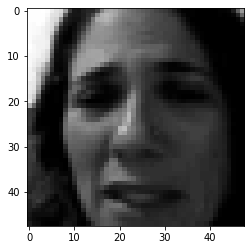

facial emotion: sad


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [6]:
# YOUR CODE HERE
y = []
x = []
for i in range(len(y_training)):
    if y_training[i][4] or y_training[i][3]:
        y.append( y_training[i])
        x.append( x_training[i])

# xtr = np.empty()
# for i in range(len(y_training)):
x_train = np.array(x)
y_train= np.array(y)
x_train = x_train.reshape(x_train.shape[0], 48*  48)

y = []
x = []
yTrain = pd.DataFrame({'happy': y_train[:, 3], 'sad': y_train[:, 4]})
ytrain = np.array([ f[3] for f in y_train])
for i in range(len(y_testing)):
    if y_testing[i][4] or y_testing[i][3]:
        y.append( y_testing[i])
        x.append( x_testing[i])
x_test = np.array(x)
y_test= np.array(y)
ytest = np.array([ f[3] for f in y_test])
print(len(ytest))
print(len(x_test))


1548
1548


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

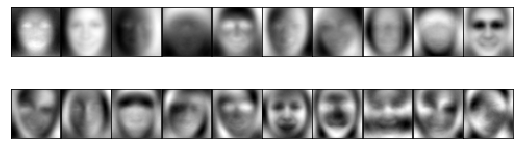

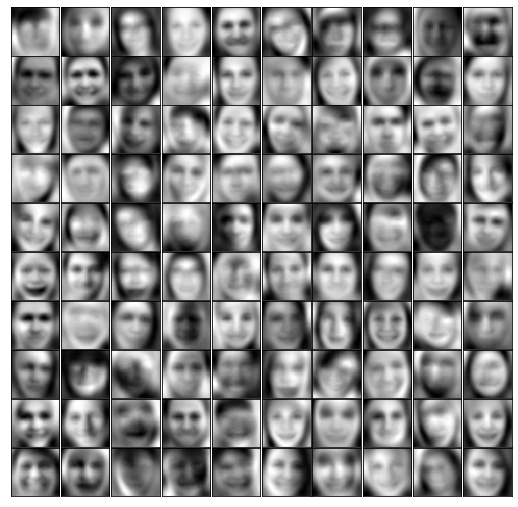

In [7]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

faces_pca = PCA(n_components=0.8)
faces_pca.fit(x_train)
fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_pca.components_[i].reshape(48,48),cmap="gray")

components = faces_pca.transform(x_train)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(48,48),cmap="gray")


In [8]:

x_train = x_train.reshape(x_train.shape[0], 48,  48)
train = x_train.reshape(x_train.shape[0], 48*48)
pca_train = faces_pca.transform(x_train.reshape(x_train.shape[0], -1))
pca_test =  faces_pca.transform(x_test.reshape(x_test.shape[0], -1))

lda=LinearDiscriminantAnalysis()
lda_train = lda.fit_transform(pca_train,ytrain.ravel())
lda_test = lda.transform(pca_test)

In [9]:
# faces_pca = LatentDirichletAllocation(n_components=0.8)
# faces_pca.fit(x_train)
# fig, axes = plt.subplots(2,10,figsize=(9,3),
#  subplot_kw={'xticks':[], 'yticks':[]},
#  gridspec_kw=dict(hspace=0.01, wspace=0.01))
# for i, ax in enumerate(axes.flat):
#      ax.imshow(faces_pca.components_[i].reshape(48,48),cmap="gray")

# components = faces_pca.transform(x_train)
# projected = faces_pca.inverse_transform(components)
# fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
#             gridspec_kw=dict(hspace=0.01, wspace=0.01))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(projected[i].reshape(48,48),cmap="gray")

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [10]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

clf = gnb.fit(train, ytrain ) 
y_pred = gnb.predict(train)
miss = (ytrain != y_pred).sum()
percent = float(miss/train.shape[0])
print("Number of mislabeled points out of a total %d points : %d"
    % (train.shape[0],miss))
print("Accuracy :")
print(miss/ train.shape[0] * -100 + 100)


Number of mislabeled points out of a total 12045 points : 4804
Accuracy :
60.11623080116231


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [11]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

In [12]:
# X, y = load_iris(return_X_y=True)

LRclf = LogisticRegression(random_state=0).fit(pca_train, ytrain)
print(LRclf.predict(pca_train))

/home/waail/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1. 1. 1. ... 0. 0. 1.]


In [13]:
print(LRclf.score(pca_test, ytest)) 

0.6918604651162791


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [14]:
# YOUR CODE HERE
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1000.0, gamma='scale')
clf.fit(pca_train, ytrain) 

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
print(clf.score(pca_test, ytest)) 

0.6905684754521964


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

My best answer was derived from the application of a logistic regresion model coupled with a feature set transformed by a pca. it had an accuracy of over 70% and was consistently the best choice since its closest competitor the SVR was expensive to train for similar results

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

[1136  108 1104    3 1506]


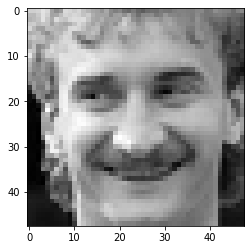

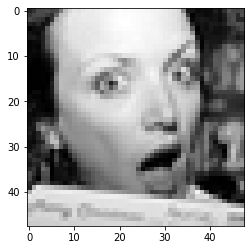

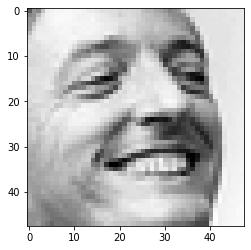

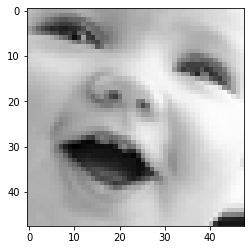

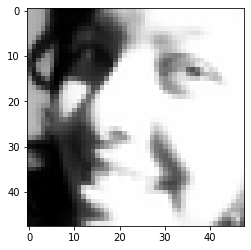

[1039  910  135 1121 1289]


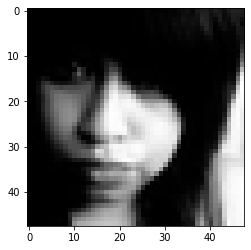

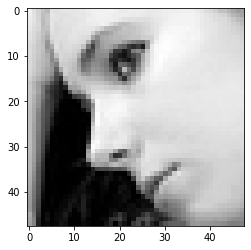

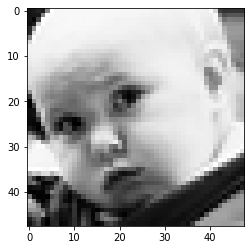

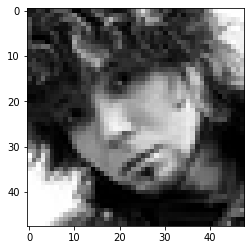

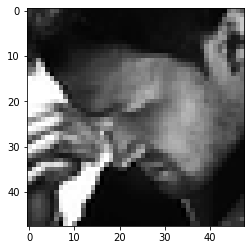

In [16]:
# YOUR CODE HERE
ypred = LRclf.predict_proba(pca_test)

topHappy = ypred[:,1].argsort()[-5:]
print(topHappy)
for x in topHappy:
    plt.imshow(x_test[x], cmap='gray')
    plt.show()
    
ypred = LRclf.predict_proba(pca_test)

topSad = ypred[:,0].argsort()[-5:]

print(topSad)

for x in topSad:
    plt.imshow(x_test[x], cmap='gray')
    plt.show()

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

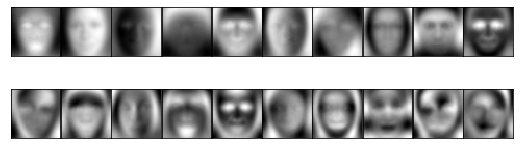

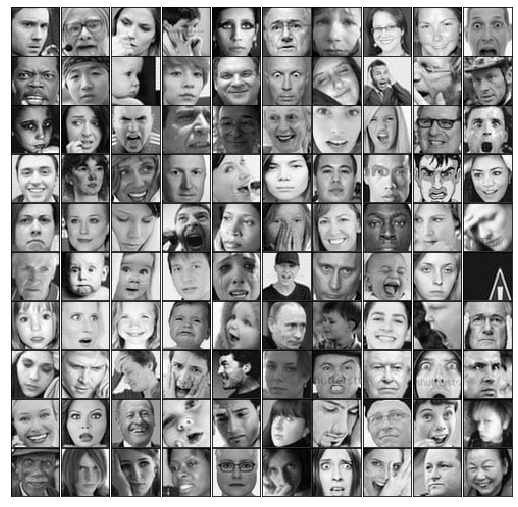

In [17]:
# YOUR CODE HERE
from sklearn.decomposition import PCA, LatentDirichletAllocation
x_training = x_training.reshape(x_training.shape[0], 48* 48)
faces_pca = PCA(n_components=0.99)
faces_pca.fit(x_training)
fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_pca.components_[i].reshape(48,48),cmap="gray")

components = faces_pca.transform(x_training)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(48,48),cmap="gray")

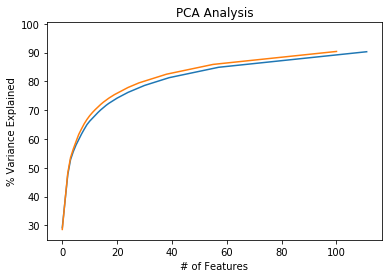

In [18]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

to_train=x_training.reshape(x_training.shape[0],2304)

to_train = scale(to_train)

faces_pca=PCA(n_components=0.90)
faces_pca.fit(to_train)

var1 = np.cumsum(np.round(faces_pca.explained_variance_ratio_, decimals=3)*100)
to_train=x_train.reshape(x_train.shape[0],2304)
faces_pca.fit(to_train)
var2 = np.cumsum(np.round(faces_pca.explained_variance_ratio_, decimals=3)*100)
var2
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(25,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var1)
plt.plot(var2)
lda=LinearDiscriminantAnalysis()
to_train=x_training.reshape(x_training.shape[0],2304)

ytraining = np.array([ f.tolist().index(1) for f in y_training])
ytesting = np.array([ f.tolist().index(1) for f in y_testing])

to_test = x_testing.reshape(x_testing.shape[0],2304)

to_train=lda.fit_transform(to_train,ytraining.ravel())
to_test=lda.transform(to_test)

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [19]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
pca_train = faces_pca.transform(x_training.reshape(x_training.shape[0], -1))
pca_test =  faces_pca.transform(x_testing.reshape(x_testing.shape[0], -1))
ytraining = np.array([ f.tolist().index(1) for f in y_training])
ytesting = np.array([ f.tolist().index(1) for f in y_testing])

gnb = GaussianNB()
clf = gnb.fit(pca_train, ytraining ) 
print(f'{clf.score(pca_test,ytesting)*100} %')


34.18779604346614 %


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

one vs all similarly to Logistic regression


[[<matplotlib.axis.YTick at 0x7f76f01053c8>,
 [Text(0, 0, 'angry'),
  Text(0, 0, 'disgust'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'happy'),
  Text(0, 0, 'sad'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'neutral')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, 'angry'),
  Text(0, 0, 'disgust'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'happy'),
  Text(0, 0, 'sad'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'neutral')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'confusion matrix')]

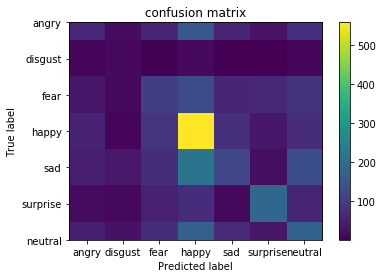

In [20]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(pca_test)
cm = confusion_matrix(ytesting, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
classes=['angry','disgust','fear','happy','sad','surprise','neutral']
title='confusion matrix'
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [21]:
# YOUR CODE HERE

LRclf = LogisticRegression(multi_class='auto',solver='lbfgs').fit(pca_train, ytraining)
print(f'{LRclf.score(pca_test,ytesting)*100} %')

35.943159654499865 %


/home/waail/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
the Logistic regresion model provided by sci kit learn is handled with a one vs rest.
this works by running c classifiers, where c is the number of classes,  and having the corresponding classes classifier be noted as positive while the rest are treated as negatives and the one with the highest score is the one outputted but the multi class classifier

[[<matplotlib.axis.YTick at 0x7f76f0045128>,
 [Text(0, 0, 'angry'),
  Text(0, 0, 'disgust'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'happy'),
  Text(0, 0, 'sad'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'neutral')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, 'angry'),
  Text(0, 0, 'disgust'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'happy'),
  Text(0, 0, 'sad'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'neutral')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'confusion matrix')]

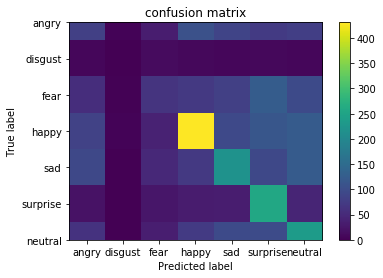

In [22]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
y_pred = LRclf.predict(pca_test)
cm = confusion_matrix(ytesting, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
classes=['angry','disgust','fear','happy','sad','surprise','neutral']
title='confusion matrix'

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
      
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [23]:
clf = SVC(kernel='rbf',C=100.0, gamma='auto')
clf.fit(to_train, ytraining) 


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[<matplotlib.axis.YTick at 0x7f76effe97b8>,
 [Text(0, 0, 'angry'),
  Text(0, 0, 'disgust'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'happy'),
  Text(0, 0, 'sad'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'neutral')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, 'angry'),
  Text(0, 0, 'disgust'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'happy'),
  Text(0, 0, 'sad'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'neutral')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'confusion matrix')]

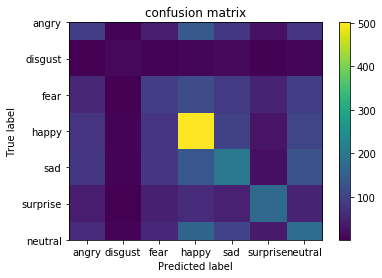

In [24]:
clf.score(to_test,ytesting)
y_pred = clf.predict(to_test)
cm = confusion_matrix(ytesting, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
classes=['angry','disgust','fear','happy','sad','surprise','neutral']
title='confusion matrix'
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
 
the SVM or specifially the SVC provided by scikit learn handles the problem with a one vs one classifier meaning each possible possible permutation of two classes, C(C-1)/2 classes total,  is ran through a binary svm which then takes the most commonly predicted value and out puts that as the class prediction.

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
Since my Logistic regeression model is the one with the highest accuracy i will be using the corresponding confusion matrix.
  
  similar -
   
   surprise > fear
   
   angry > sad
   
   happy> angry
   
   neutral > happy, sad
   
   sad > angry
   
   
   
   different -
   
   all  > disgust
   
   happy > surpirse 
   
   angry > surprise
   
   disgust > all
   
   sad > surprise
   
   surprise > angry

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [25]:
# YOUR CODE HERE


3589
3589
3589


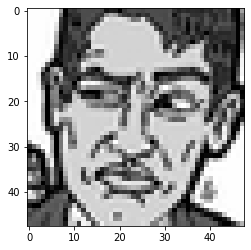

neutral
angry
6
0
[0.09690211 0.0986552  0.16437438 0.10394336 0.09080318 0.16671891
 0.27860286]


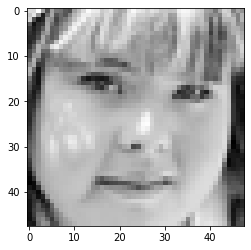

sad
neutral
4
6
[0.1174283  0.13183616 0.12488075 0.10521101 0.22207174 0.19856317
 0.10000887]


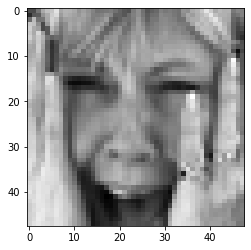

angry
fear
0
2
[0.33374825 0.0908863  0.18500319 0.0313919  0.17245863 0.07057765
 0.11593409]


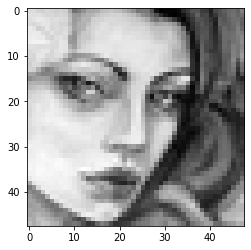

surprise
angry
5
0
[0.07477474 0.11173449 0.14401929 0.10066339 0.15006293 0.29284377
 0.12590137]


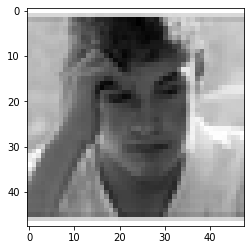

sad
fear
4
2
[0.24366929 0.0986461  0.16621086 0.02469339 0.27001027 0.14342809
 0.053342  ]


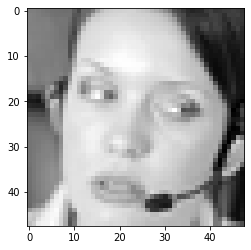

surprise
angry
5
0
[0.1370384  0.10454712 0.16256014 0.06995327 0.09264181 0.32465981
 0.10859946]


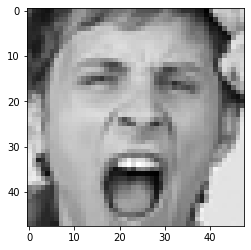

surprise
angry
5
0
[0.12453506 0.04522603 0.26932161 0.01488137 0.10848545 0.3083262
 0.12922427]


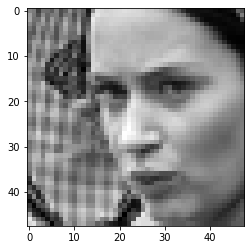

angry
sad
0
4
[0.2705266  0.1066747  0.13697875 0.05695445 0.18425556 0.09353641
 0.15107354]


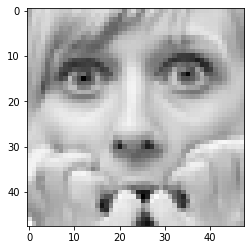

surprise
fear
5
2
[0.12696    0.09943704 0.14916284 0.07319496 0.08075968 0.33559751
 0.13488796]


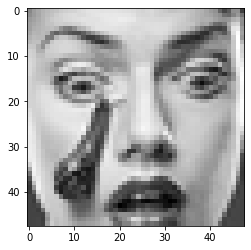

surprise
fear
5
2
[0.14673123 0.1500063  0.19186258 0.07589466 0.13091051 0.26338876
 0.04120596]


In [26]:
y_pred = LRclf.predict(pca_test)
y_pred
y_prob = LRclf.predict_proba(pca_test)
print(len(y_pred))
print(len(y_prob))
print(len(ytesting))
y = ytesting
pics = x_testing
c = 0
while c < len(y_pred):
    if y_pred[c] == y[c]:
        pics = np.delete(pics,c ,0)
        y_pred = np.delete(y_pred, c)
        y = np.delete(y, c)
        y_prob = np.delete(y_prob,c ,0)
        
    else:
        c = c+1
# for x in range(c)
# y_prob = LRclf.predict_proba(pca_test[0])
# print(y_prob[0])
# print(y_pred[0])
# print(len(y))
# print( )

for i in range(11):
    if y_prob[i][y_pred[i]] > .2:
        plt.imshow(pics[i], cmap='gray')
        plt.show()
        emo = np.array([0,0,0,0,0,0,0])
        emo[y_pred[i]] = 1
        print(get_emotion(emo))
        emo = np.array([0,0,0,0,0,0,0])
        emo[y[i]] = 1
        print(get_emotion(emo))
        print(y_pred[i])
        print(y[i])
        print(y_prob[i])
        i= i+1
   

# 8318 only

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [27]:
# YOUR CODE HERE